In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
full_df = pd.read_csv("stages_TDF.csv")
full_df.head()

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA


In [4]:
#full_df.loc[full_df["Type"].str.endswith('Stage')==True]["Type"].unique()

In [8]:
full_df['Type'] = full_df['Type'].replace({'Mountain Stage': 'Mountain stage', 'Flat Stage': 'Flat stage',
                                          'Half Stage':'Half stage'})

In [9]:
multiple_winners = full_df[full_df["Winner_Country"].str.startswith("c")==True]
multiple_winners

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
1691,21,1938-07-31,279.0,Lille,Paris,Plain stage,Antonin Magne André Leducq[n 2],"c(""FRA"", ""FRA"")"
1716,17b,1937-07-22,37.0,Royan,Saintes,Plain stage,Adolph Braeckeveldt Heinz Wengler[n 3],"c(""BEL"", ""GER"")"
1781,5,1934-07-07,293.0,Belfort,Evian,Plain stage,René Le Grevès Georges Speicher[n 2],"c(""FRA"", ""FRA"")"
1995,3,1924-06-26,405.0,Cherbourg,Brest,Plain stage,Philippe Thys Théophile Beeckman,"c(""BEL"", ""BEL"")"
2187,2,1907-07-10,398.0,Roubaix,Metz,Plain stage,Emile Georget[n 2] Louis Trousselier[n 2],"c(""FRA"", ""FRA"")"


In [10]:
full_df.describe()

,Distance
count,2236.000000
mean,196.782994
std,90.176385
min,1.000000
25%,156.000000
50%,199.000000
75%,236.000000
max,482.000000


In [11]:
stage_dist = full_df.groupby(["Type"]).describe()
stage_dist.sort_values([('Distance',  'mean')], ascending=False)

Distance                                         \
                                 count        mean        std    min      25%   
Type                                                                            
Stage with mountain               11.0  337.818182  17.162856  323.0  325.500   
Flat cobblestone stage             2.0  234.000000  29.698485  213.0  223.500   
Plain stage                     1053.0  226.270940  82.402861   35.0  180.000   
Plain stage with cobblestones      1.0  224.000000        NaN  224.0  224.000   
Stage with mountain(s)           530.0  220.900189  66.197618   19.6  182.000   
Hilly stage                       76.0  196.328947  34.414004   97.0  176.250   
Mountain stage                    51.0  191.519608  24.666366  139.0  175.250   
Flat stage                       119.0  190.563025  32.306828   95.0  172.250   
Medium mountain stage             33.0  185.303030  21.684506  145.5  165.000   
Intermediate stage                 3.0  183.166667   5.033223  178.5  180.500   
Transition stage                   4.0  179.625000  19.228343  159.0  165.375   
High mountain stage               43.0  172.174419  31.450809  101.0  150.250   
Team time trial                   87.0  103.278161  81.495910    4.0   35.250   
Half stage                         5.0  102.800000  30.011664   70.0   86.000   
Mountain time trial               13.0   45.338462  35.822329   12.0   21.000   
Individual time trial            205.0   39.111098  25.741238    1.0   14.000   

                                                       
                                  50%      75%    max  
Type                                                   
Stage with mountain            333.00  347.000  371.0  
Flat cobblestone stage         234.00  244.500  255.0  
Plain stage                    210.00  252.000  482.0  
Plain stage with cobblestones  224.00  224.000  224.0  
Stage with mountain(s)         219.00  255.750  416.0  
Hilly stage                    198.25  216.125  320.0  
Mountain stage                 190.50  205.500  258.0  
Flat stage                     194.00  213.250  262.0  
Medium mountain stage          187.50  200.000  226.0  
Intermediate stage             182.50  185.500  188.5  
Transition stage               181.50  195.750  196.5  
High mountain stage            178.00  192.750  242.5  
Team time trial                 70.00  165.000  285.0  
Half stage                      91.00  123.000  144.0  
Mountain time trial             37.00   47.500  137.0  
Individual time trial           41.50   57.000  139.0

In [12]:
count = [c for c in full_df["Type"].value_counts()]
count

[1053, 530, 205, 119, 87, 76, 51, 43, 33, 13, 11, 5, 4, 3, 2, 1]

In [13]:
dist= stage_dist[('Distance',  'mean')]
dist=dist.sort_values(ascending=False)

In [14]:
distance = [d for d in dist]
distance

[337.8181818181818,
 234.0,
 226.27094017094015,
 224.0,
 220.9001886792453,
 196.32894736842104,
 191.51960784313727,
 190.56302521008402,
 185.3030303030303,
 183.16666666666666,
 179.625,
 172.17441860465115,
 103.27816091954024,
 102.8,
 45.33846153846154,
 39.111097560975615]

In [15]:
stages = np.arange(len(distance))
stages

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

<IPython.core.display.Javascript object>


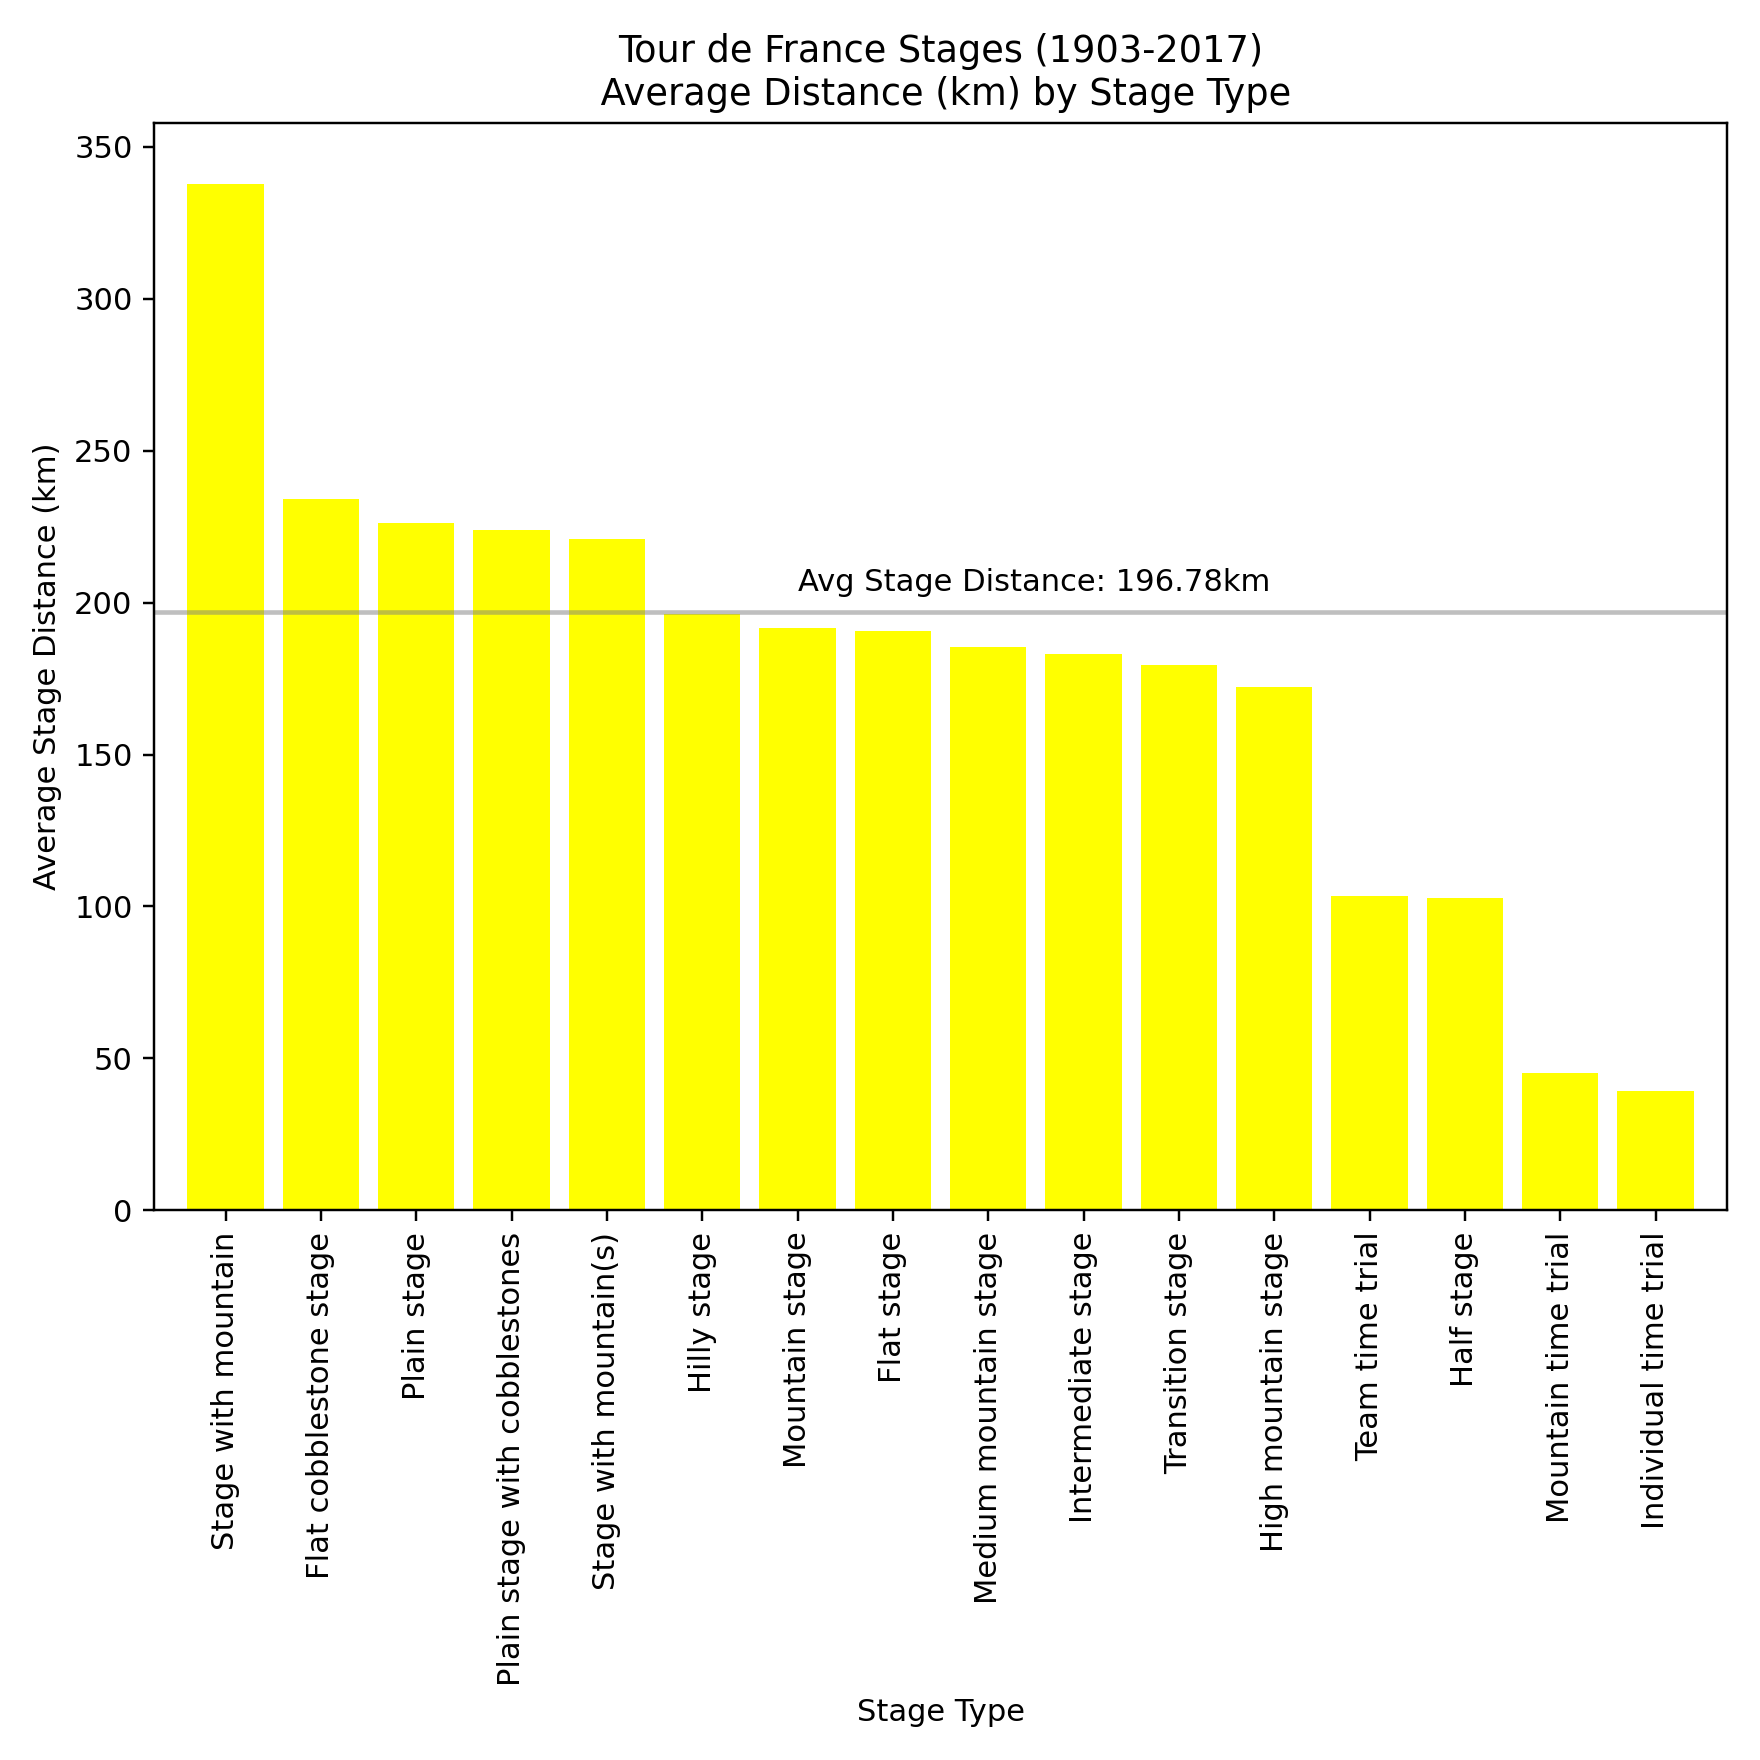

<BarContainer object of 16 artists>

In [16]:
plt.figure(figsize=(8,8))
plt.bar(stages,distance,color='yellow',align="center")

In [17]:
mean_dist = full_df["Distance"].mean()
label = f"Avg Stage Distance: {round(mean_dist,2)}km"
plt.hlines(mean_dist,-1,len(count), alpha=0.5, color="gray")
plt.text(6, mean_dist+10, label, ha='left', va='center')

Text(6, 206.78299418604652, 'Avg Stage Distance: 196.78km')

In [18]:
stage_type = dist.index
stage_type
plt.xticks(stages, stage_type,rotation="vertical")

([<matplotlib.axis.XTick at 0x7f8cf82291c0>,
 [Text(0, 0, 'Stage with mountain'),
  Text(1, 0, 'Flat cobblestone stage'),
  Text(2, 0, 'Plain stage'),
  Text(3, 0, 'Plain stage with cobblestones'),
  Text(4, 0, 'Stage with mountain(s)'),
  Text(5, 0, 'Hilly stage'),
  Text(6, 0, 'Mountain stage'),
  Text(7, 0, 'Flat stage'),
  Text(8, 0, 'Medium mountain stage'),
  Text(9, 0, 'Intermediate stage'),
  Text(10, 0, 'Transition stage'),
  Text(11, 0, 'High mountain stage'),
  Text(12, 0, 'Team time trial'),
  Text(13, 0, 'Half stage'),
  Text(14, 0, 'Mountain time trial'),
  Text(15, 0, 'Individual time trial')])

In [19]:
plt.xlim(-0.75,len(stages)-0.25)
plt.ylim(0, max(distance)+20)

(0.0, 357.8181818181818)

In [20]:
plt.xlabel("Stage Type")
plt.ylabel("Average Stage Distance (km)")
#plt.suptitle("Average Distance (km) by Stage Type",fontdict={'size': '12'})
#plt.title("Tour de France Stages (1903-2017)", loc='center',fontdict={'fontsize': '10','color': 'grey'})
plt.title("Tour de France Stages (1903-2017)\n Average Distance (km) by Stage Type", loc='center')

Text(0.5, 1.0, 'Tour de France Stages (1903-2017)\n Average Distance (km) by Stage Type')

In [21]:
plt.tight_layout()
plt.savefig("tour_stage_distance.png")
plt.show()